In [1]:
"""Plot methane systemsize density."""
import matplotlib
import matplotlib.pyplot as plt

# matplotlib.use("pdf")
import os
import shutil

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.ticker import (
    FormatStrFormatter,
    MaxNLocator,
    MultipleLocator,
    NullFormatter,
    ScalarFormatter,
    StrMethodFormatter,
)
from scipy import stats

In [2]:
plt.rcParams["font.family"] = "times" # "helvetica"
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'


    rcut (Ang)  MCCCS-MN  MCCCS-MN-CI    LAMMPS  LAMMPS-CI
3         10.7  0.375310      0.00002  0.375965    0.00001
4         11.4  0.375950      0.00002  0.375872    0.00001
5         12.5  0.376100      0.00002  0.375981    0.00001
6         13.2  0.375860      0.00002  0.375980    0.00001
7         14.3  0.375810      0.00002  0.375918    0.00001
8         15.1  0.375890      0.00002  0.375907    0.00001
9         16.0  0.375910      0.00002  0.375912    0.00001
10        16.9  0.375882      0.00002  0.375889    0.00001
11        17.9  0.375880      0.00002  0.375889    0.00001
12        24.0  0.375880      0.00002  0.375896    0.00001
   rcut (Ang)  MCCCS-MN  MCCCS-MN-CI    LAMMPS  LAMMPS-CI
0        10.0   0.37517      0.00003  0.376381    0.00002
1        14.0   0.37578      0.00003  0.375934    0.00002
2        18.0   0.37587      0.00003  0.375928    0.00002
{}


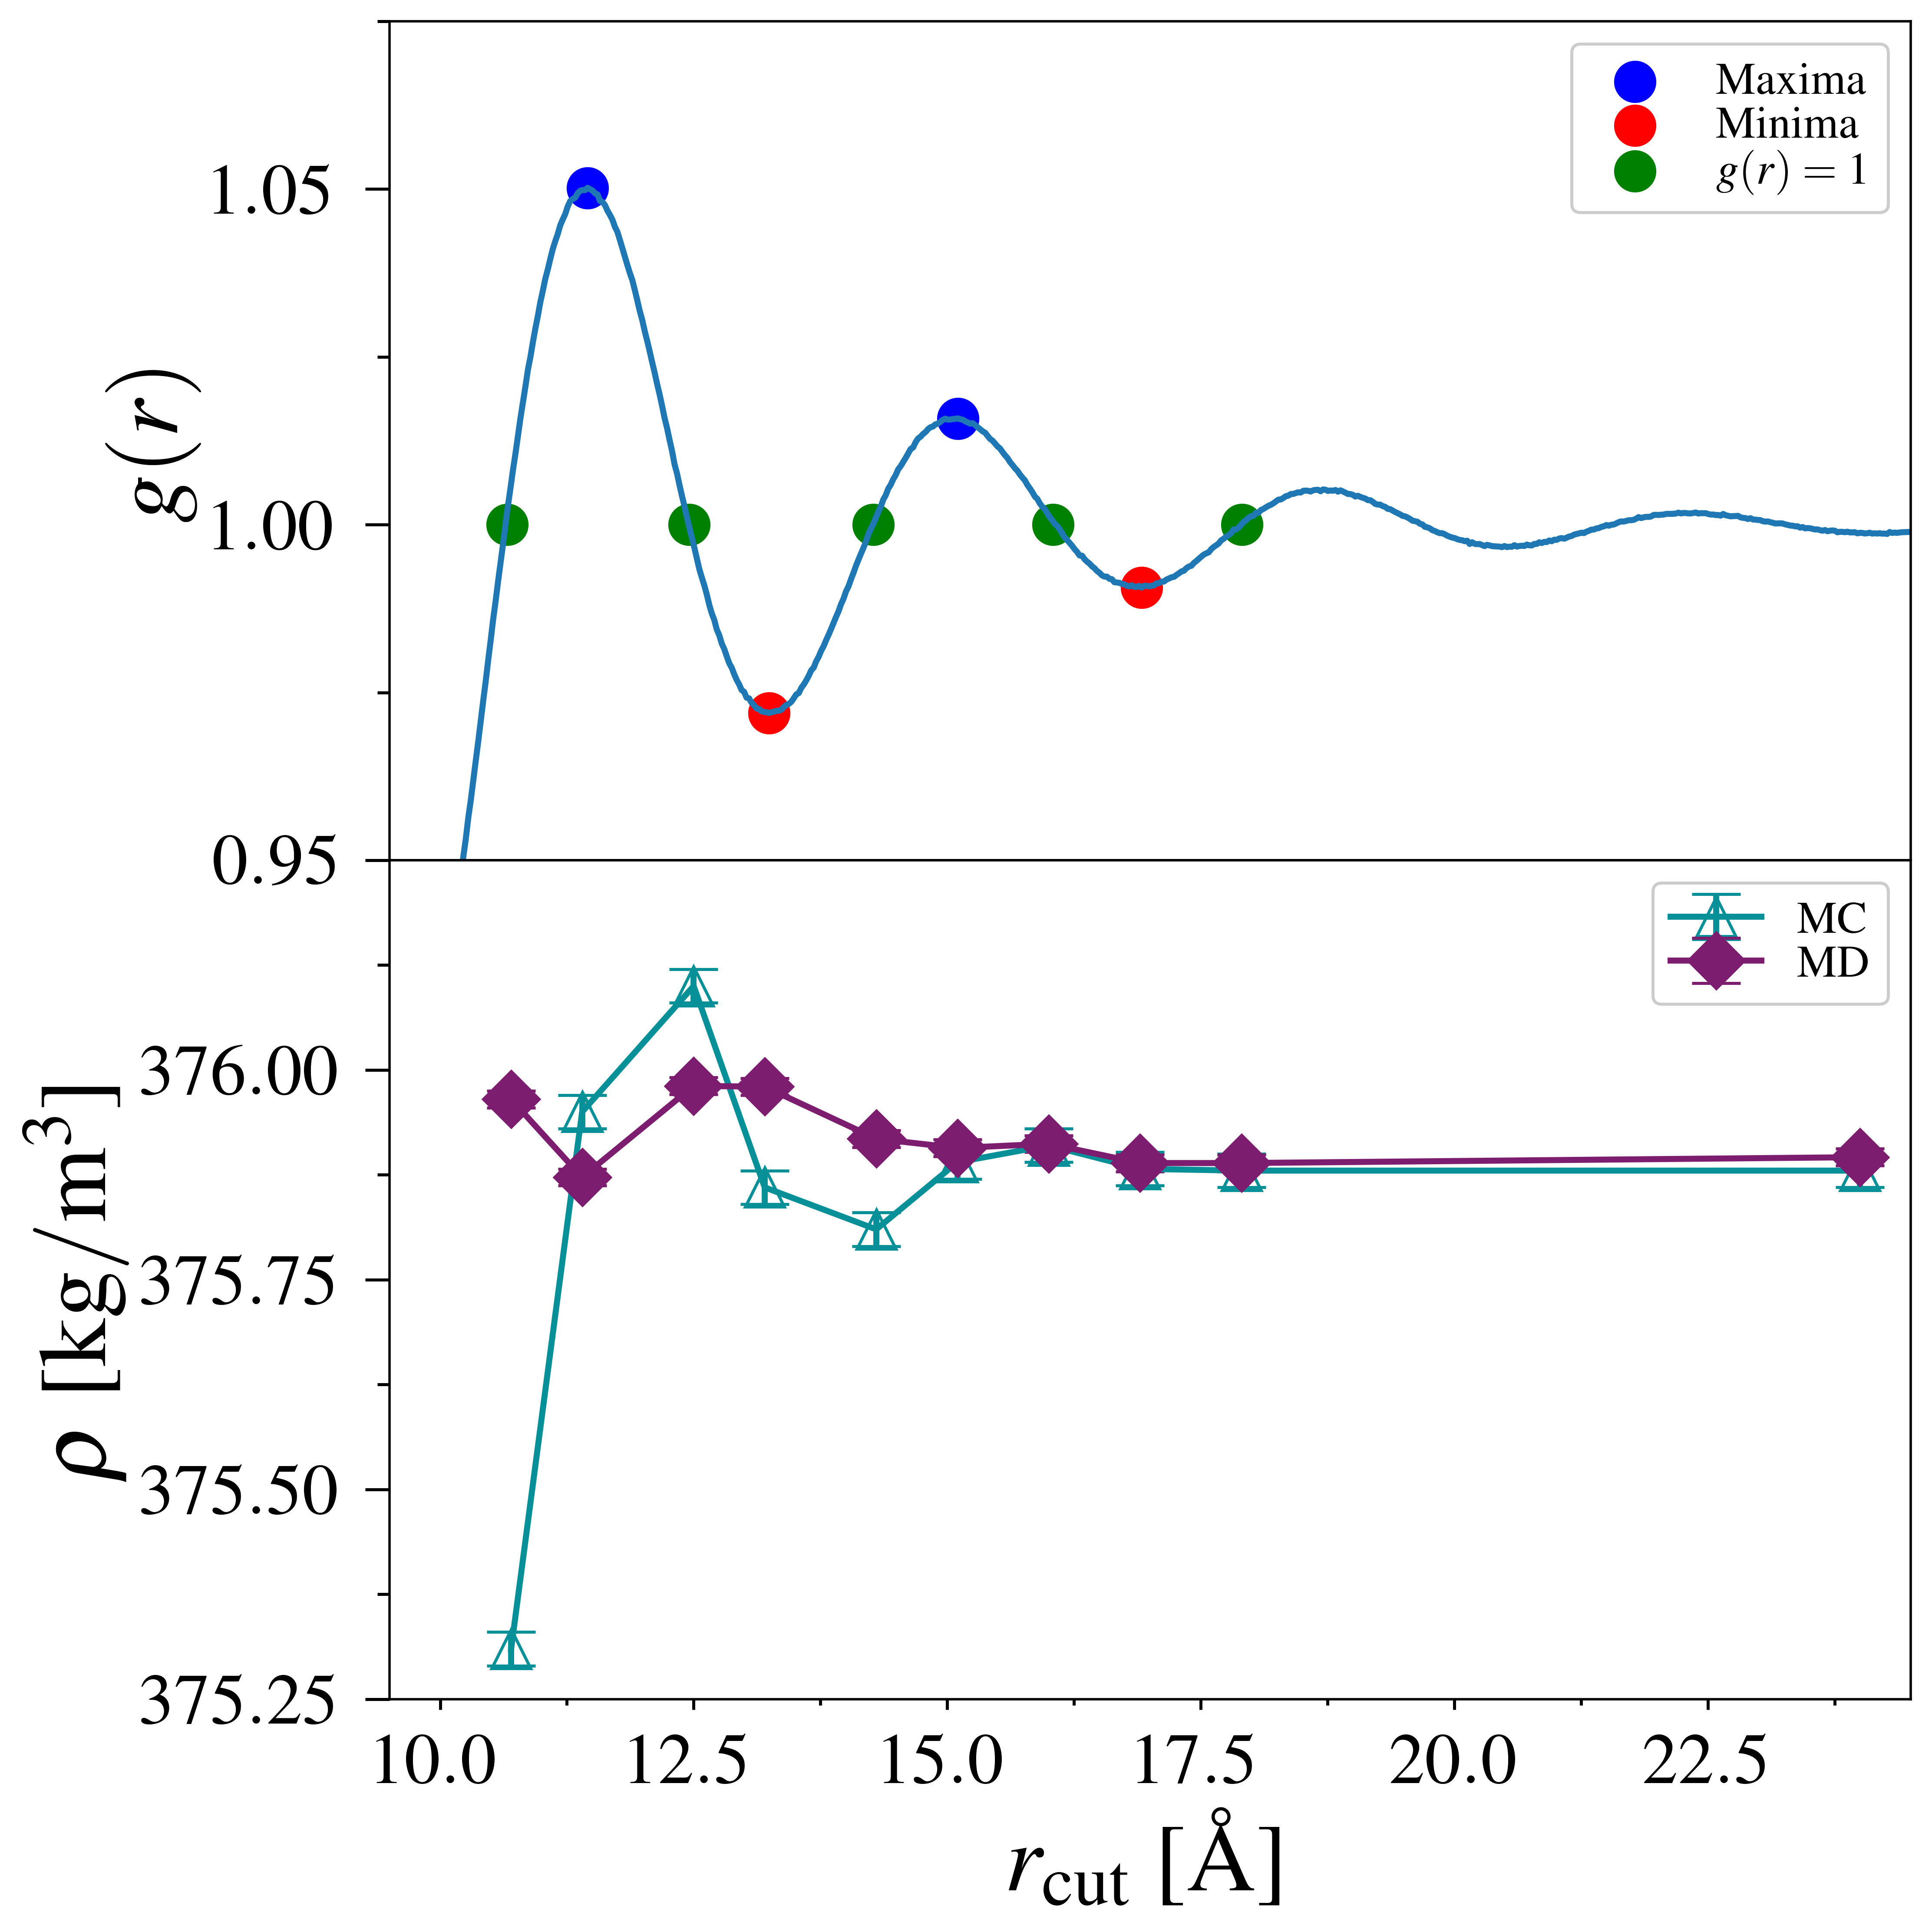

In [3]:
# # plot settings
# ms = 8  # markersize
# xtickfs = 11  # xtickfontsize
# xlabelfs = 14  # xlabelfontsize
# ylabelfs = 14  # ylabelfontsize
# ytickfs = 11  # ytickfontsize
# titlefs = 14  # title size
# legendfs = 9
# alpha = 0.2
# markersize = 5

symbols = {}

symbols["MCCCS-MN"] = "^"
symbols["MCCCS-MN (MOD)"] = "<"

symbols["LAMMPS"] = "D"
symbols["MCCCS-MN-T-1"] = "o"

colors = {}
colors["MCCCS-MN"] = "#089099"
colors["MCCCS-MN (MOD)"] = "c"

colors["LAMMPS"] = "#7C1D6F"


fill_styles = {
    "MCCCS-MN": "none", 
    "MCCCS-MN (MOD)": "none", 
    "LAMMPS": "full",
}

engines = ["MCCCS-MN", "MCCCS-MN (MOD)", "LAMMPS", "MCCCS-MN-T-1"]

data_file = "methane_data.csv"
rdf_file = "avg_rdf.txt"
full_data_file = "rcut_methane_data_final.csv"
full_data = pd.read_csv(full_data_file)
full_1800_data = full_data.loc[full_data["N"] == 1800]
full_1800_data = full_1800_data.loc[full_1800_data["tailc"] == "Yes"]
full_1800_data = full_1800_data[
    ["rcut (Ang)", "MCCCS-MN", "MCCCS-MN-CI", "LAMMPS", "LAMMPS-CI"]
]
print(full_1800_data)
full_900_data = full_data.loc[full_data["N"] == 900]
full_900_data = full_900_data.loc[full_900_data["tailc"] == "Yes"]
full_900_data = full_900_data[
    ["rcut (Ang)", "MCCCS-MN", "MCCCS-MN-CI", "LAMMPS", "LAMMPS-CI"]
]
print(full_900_data)

data = {}
rcuts = [10, 14, 18, 24]

print(data)

fig, axs = plt.subplots(
    2,
    1,
    sharex="row",
    sharey=False,
    figsize=(9, 9),
    gridspec_kw={"wspace": 0, "hspace": 0},
)
ax1, ax2 = axs[0], axs[1]
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)


#### Plotting RDF
rdf_data = np.genfromtxt(rdf_file)
ax1.plot(rdf_data[:, 0], rdf_data[:, 1])
maxima_rs = [11.4538, 15.1042497]
maxima_rdfs = [1.05018341, 1.0158270236]
minima_rs = [13.24225, 16.91725015]
minima_rdfs = [0.9719530474394559, 0.9906199406832]

ones_rs = [10.66, 12.4545, 14.2715, 16.0425, 17.905]
ones_rdfs = [1] * 5

ax1.scatter(maxima_rs, maxima_rdfs, color="b", label="Maxima")

ax1.scatter(minima_rs, minima_rdfs, color="r", label="Minima")

ax1.scatter(ones_rs, ones_rdfs, color="g", label="$g(r)=1$")

####################################

### Plotting 1800 data

# MCCCS-MN

###################

ax2.errorbar(
    full_1800_data["rcut (Ang)"],
    1000 * full_1800_data["MCCCS-MN"],
    1000 * full_1800_data["MCCCS-MN-CI"],
    # capsize=4,
    label="MC",  # + " " + "$R^2$" + f"={res.rvalue**2:.2f}",
    marker=symbols["MCCCS-MN"],
    color=colors["MCCCS-MN"],
    fillstyle=fill_styles["MCCCS-MN"]
    # markersize=markersize,
)

ax2.errorbar(
    full_1800_data["rcut (Ang)"],
    1000 * full_1800_data["LAMMPS"],
    1000 * full_1800_data["LAMMPS-CI"],
    # capsize=4,
    label="MD",  # + " " + "$R^2$" + f"={res.rvalue**2:.2f}",
    marker=symbols["LAMMPS"],
    color=colors["LAMMPS"],
    # fillstyle=fill_styles["LAMMPS"]
    # markersize=markersize,
)

props = dict(boxstyle="round", facecolor="none", alpha=1, ec="grey")
ax1.legend(frameon=True, ncol=1, labelspacing=0.05)
ax2.legend(frameon=True, ncol=1, labelspacing=0.05)


# adjusting ticks

for ax in [ax1, ax2]:  # , ax3, ax4]:
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax1.set_xlim([9.5, 24.5])
ax2.set_xlim([9.5, 24.5])
ax1.set_ylim([0.95, 1.075])
ax2.set_ylim([375.25, 376.2499])
plt.setp(ax1.get_xticklabels(), visible=False)


ax2.set_xlabel(
    "$r_{\mathrm{cut}}$ [$\mathrm{\AA}$]",
)
ax1.set_ylabel(r"$g(r)$")
ax2.set_ylabel(r"$\rho$ [$\mathrm{{kg}/{m^3}}$]")


ax1.tick_params(which='both', width=1)
ax1.tick_params(which="major", length=8, axis="y", bottom=False)
ax1.tick_params(which="minor", length=4, axis="y", bottom=False)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
            
ax2.tick_params(which='both', width=1)
ax2.tick_params(which="major", length=8, axis="y", bottom=False)
ax2.tick_params(which="minor", length=4, axis="y", bottom=False)
ax2.minorticks_on()
ax2.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
            
    
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    ) # labels along the bottom edge are off
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    length=8
    ) # labels along the bottom edge are off


ax = plt.gca()
plt.tight_layout()

fig.tight_layout()
# plt.show()
plt.savefig("methane_rcut.pdf", dpi=500)


